In [1]:
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append(os.path.join(os.path.dirname(""),".."))

import numpy
import custom
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt

In [2]:
def make_word_pair(corpus, window_size = 1) :
    word_pair = []
    for s in corpus :
        for w in range(len(s)) :
            for i in range(1,window_size+1) :
                if w-i >= 0 :
                    temp = [s[w], s[w-i]]
                    word_pair.append(temp)
                if w+i < len(s) :
                    if s[w+i] > 0 :
                        temp = [s[w], s[w+i]]
                        word_pair.append(temp)
    
    return word_pair

In [3]:
sentences = [
    'He is a king.',
    'She is a queen.',
    'He is a man.',
    'She is a woman.',
    'Warsaw is Poland capital.',
    'Berlin is Germany capital.',
    'Paris is France capital.',
    'Seoul is Korea capital.', 
    'Bejing is China capital.',
    'Tokyo is Japan capital.',
]

word_dict, number_dict = custom.make_dict(sentences)
corpus = custom.word_num_encoding(sentences, word_dict)
comatrix = custom.make_comatrix(corpus, len(word_dict), window_size=2)

print(word_dict)
print(corpus)
print(comatrix)

{'<pad>': 0, '<unk>': 1, 'he': 2, 'is': 3, 'a': 4, 'king': 5, 'she': 6, 'queen': 7, 'man': 8, 'woman': 9, 'warsaw': 10, 'poland': 11, 'capital': 12, 'berlin': 13, 'germany': 14, 'paris': 15, 'france': 16, 'seoul': 17, 'korea': 18, 'bejing': 19, 'china': 20, 'tokyo': 21, 'japan': 22}
[[ 2  3  4  5]
 [ 6  3  4  7]
 [ 2  3  4  8]
 [ 6  3  4  9]
 [10  3 11 12]
 [13  3 14 12]
 [15  3 16 12]
 [17  3 18 12]
 [19  3 20 12]
 [21  3 22 12]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 4. 1. 2. 1. 1. 1. 1. 1. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 2. 4. 0. 1. 2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [4]:
word_pair = make_word_pair(corpus, 2)

print(word_pair)

[[2, 3], [2, 4], [3, 2], [3, 4], [3, 5], [4, 3], [4, 5], [4, 2], [5, 4], [5, 3], [6, 3], [6, 4], [3, 6], [3, 4], [3, 7], [4, 3], [4, 7], [4, 6], [7, 4], [7, 3], [2, 3], [2, 4], [3, 2], [3, 4], [3, 8], [4, 3], [4, 8], [4, 2], [8, 4], [8, 3], [6, 3], [6, 4], [3, 6], [3, 4], [3, 9], [4, 3], [4, 9], [4, 6], [9, 4], [9, 3], [10, 3], [10, 11], [3, 10], [3, 11], [3, 12], [11, 3], [11, 12], [11, 10], [12, 11], [12, 3], [13, 3], [13, 14], [3, 13], [3, 14], [3, 12], [14, 3], [14, 12], [14, 13], [12, 14], [12, 3], [15, 3], [15, 16], [3, 15], [3, 16], [3, 12], [16, 3], [16, 12], [16, 15], [12, 16], [12, 3], [17, 3], [17, 18], [3, 17], [3, 18], [3, 12], [18, 3], [18, 12], [18, 17], [12, 18], [12, 3], [19, 3], [19, 20], [3, 19], [3, 20], [3, 12], [20, 3], [20, 12], [20, 19], [12, 20], [12, 3], [21, 3], [21, 22], [3, 21], [3, 22], [3, 12], [22, 3], [22, 12], [22, 21], [12, 22], [12, 3]]


In [5]:
x = []
t = []
for data in word_pair :
    x.append(data[0])
    t.append(data[1])


In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NN(nn.Module) :
    def __init__(self, word_size) :
        super().__init__();
        self.f = nn.Embedding(word_size, 2, device = device, max_norm=1, padding_idx=0)
        self.g = nn.Linear(2, word_size, device = device)
    def forward(self, x) :
        y = self.f(x)
        y = self.g(y)
        return y

tensor_x = torch.tensor(x, dtype = torch.long, device = device)
tensor_t = torch.tensor(t, dtype = torch.long, device = device)

F = NN(len(word_dict))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(F.parameters())
epoch = 3000

for e in range(epoch) :
    tensor_y = F(tensor_x)

    loss = loss_function(tensor_y, tensor_t)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (e+1) % 100 == 0 :
        print("epoch {} | loss {}".format(e+1, loss))

epoch 100 | loss 3.2969884872436523
epoch 200 | loss 3.1529855728149414
epoch 300 | loss 3.007655143737793
epoch 400 | loss 2.866257667541504
epoch 500 | loss 2.7386183738708496
epoch 600 | loss 2.627227544784546
epoch 700 | loss 2.534878730773926
epoch 800 | loss 2.457144021987915
epoch 900 | loss 2.3943839073181152
epoch 1000 | loss 2.3473684787750244
epoch 1100 | loss 2.3118836879730225
epoch 1200 | loss 2.285196542739868
epoch 1300 | loss 2.264643907546997
epoch 1400 | loss 2.248727321624756
epoch 1500 | loss 2.235870838165283
epoch 1600 | loss 2.2250466346740723
epoch 1700 | loss 2.215860366821289
epoch 1800 | loss 2.207441806793213
epoch 1900 | loss 2.1996424198150635
epoch 2000 | loss 2.192375898361206
epoch 2100 | loss 2.185598850250244
epoch 2200 | loss 2.17931866645813
epoch 2300 | loss 2.1733617782592773
epoch 2400 | loss 2.167581558227539
epoch 2500 | loss 2.161820888519287
epoch 2600 | loss 2.1559271812438965
epoch 2700 | loss 2.1498191356658936
epoch 2800 | loss 2.1435754

In [7]:

vector_df = pandas.DataFrame(F.state_dict()['f.weight'].numpy(), columns = ['a','b'])
vector_df['word'] = list(word_dict.keys())

print(vector_df)

           a         b     word
0   0.000000  0.000000    <pad>
1  -0.103747  0.596194    <unk>
2  -0.997267 -0.084300       he
3   0.384586 -0.857056       is
4   0.227255  0.974897        a
5  -0.997152 -0.083953     king
6  -0.997325 -0.083358      she
7  -0.997244 -0.083566    queen
8  -0.997323 -0.083534      man
9  -0.997322 -0.083566    woman
10 -0.539097  0.409465   warsaw
11 -0.061356  0.543879   poland
12 -0.724626  0.258355  capital
13 -0.688494  0.314888   berlin
14  0.051446  0.756350  germany
15 -0.970322  0.157813    paris
16  0.052281  0.818910   france
17 -0.663105  0.277856    seoul
18  0.003166  0.718626    korea
19 -0.922338  0.199392   bejing
20  0.174695  0.985809    china
21 -0.634993  0.334631    tokyo
22  0.143709  0.990924    japan


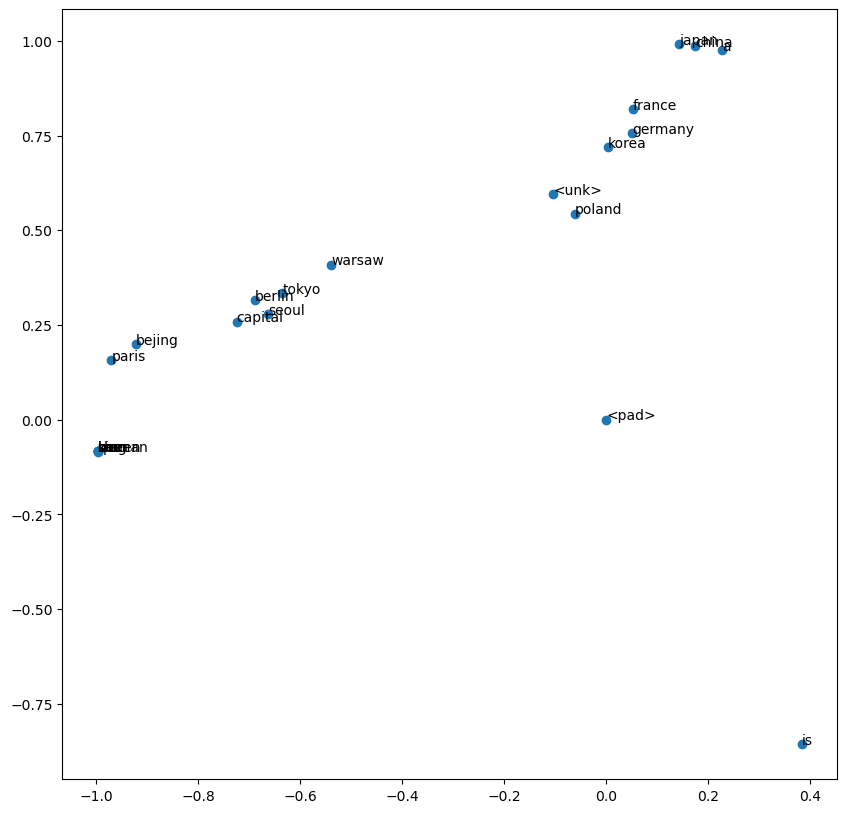

In [8]:
ano = vector_df['word'].values.tolist()
a = vector_df['a'].values.tolist()
b = vector_df['b'].values.tolist()

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(a,b)

for i in range(len(ano)) :
    ax.annotate(ano[i], (a[i], b[i]))

plt.show()

In [3]:
test = nn.Linear(5,2)
a = torch.randn(1,5)

print(test(a))
print(numpy.dot(a.numpy(), test.state_dict()['weight'].T.numpy()) + test.state_dict()['bias'].numpy())

tensor([[ 1.5859, -0.2268]], grad_fn=<AddmmBackward0>)
[[ 1.5858903  -0.22676873]]
